# Earthquakes


### Content

This dataset includes a record of the date, time, location, depth, magnitude, and source of every earthquake with a reported magnitude 5.5 or higher since 1965.


In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
import math
import matplotlib
import seaborn as sns


In [2]:
df = pd.read_csv('database.csv', sep=',', header=0)
#df = pd.read_csv('../input/autos.csv', sep=',', header=0, encoding='cp1252')


In [3]:
df.sample(5)


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
2368,07/16/1972,17:09:08,-3.136,100.890,Earthquake,36.8,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM771618,ISCGEM,ISCGEM,ISCGEM,Automatic
13868,01/26/1998,13:02:38,-36.068,-100.968,Earthquake,10.0,NaN,NaN,5.5,MWC,...,NaN,NaN,NaN,NaN,1.24,USP0008F03,US,US,HRV,Reviewed
11702,11/28/1993,10:50:27,-5.599,110.267,Earthquake,569.4,NaN,NaN,5.5,MW,...,NaN,NaN,NaN,NaN,1.00,USP00064CE,US,US,HRV,Reviewed
21148,02/04/2012,07:40:13,-20.536,-174.035,Earthquake,8.0,NaN,391.0,5.8,MWB,...,NaN,27.0,NaN,NaN,0.85,USP000JEF9,US,US,US,Reviewed
21238,04/14/2012,22:05:26,-18.972,168.741,Earthquake,11.0,NaN,471.0,6.2,MWW,...,NaN,19.0,NaN,NaN,1.19,USP000JHZJ,US,US,US,Reviewed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
Date                          23412 non-null object
Time                          23412 non-null object
Latitude                      23412 non-null float64
Longitude                     23412 non-null float64
Type                          23412 non-null object
Depth                         23412 non-null float64
Depth Error                   4461 non-null float64
Depth Seismic Stations        7097 non-null float64
Magnitude                     23412 non-null float64
Magnitude Type                23409 non-null object
Magnitude Error               327 non-null float64
Magnitude Seismic Stations    2564 non-null float64
Azimuthal Gap                 7299 non-null float64
Horizontal Distance           1604 non-null float64
Horizontal Error              1156 non-null float64
Root Mean Square              17352 non-null float64
ID                            23412 non-null object
Sou

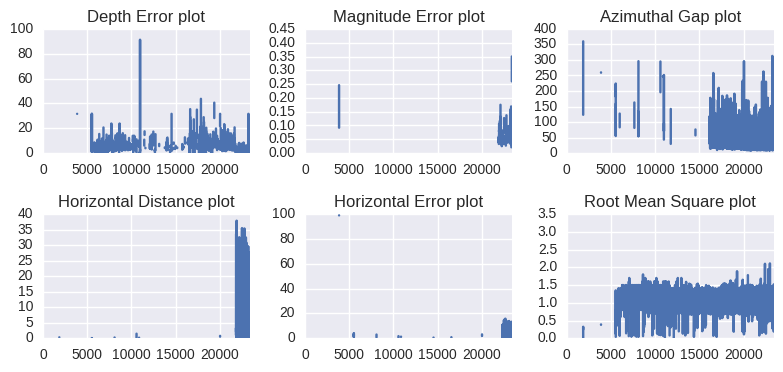

In [5]:
plt.subplot(331)
plt.title("Depth Error plot")
df['Depth Error'].plot()

plt.subplot(332)
plt.title('Magnitude Error plot')
df['Magnitude Error'].plot()

plt.subplot(333)
plt.title('Azimuthal Gap plot')
df['Azimuthal Gap'].plot()

plt.subplot(334)
plt.title('Horizontal Distance plot')
df['Horizontal Distance'].plot()

plt.subplot(335)
plt.title('Horizontal Error plot')
df['Horizontal Error'].plot()

plt.subplot(336)
plt.title('Root Mean Square plot')
df['Root Mean Square'].plot()

plt.tight_layout()


In [ ]:
#from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap 
#import matplotlib.pyplot as plt
import numpy as np
import string
import matplotlib.cm as cm

areas = [
    { 'label': 'Italy',
      'llcrnrlat': 35.57580,
      'llcrnrlon': 6.67969,
      'urcrnrlat': 47.55336,
      'urcrnrlon': 19.33594},
    { 'label': 'Greece',
      'llcrnrlat': 33.62262,
      'llcrnrlon': 18.01758,
      'urcrnrlat': 42.33317,
      'urcrnrlon': 29.17969},
    { 'label': 'Japan',
      'llcrnrlat': 29.65822,
      'llcrnrlon': 127.79297,
      'urcrnrlat': 46.41419,
      'urcrnrlon': 151.08398},
    { 'label': 'South-east Asia',
      'llcrnrlat': -11.90095,
      'llcrnrlon': 92.02148,
      'urcrnrlat': 19.02967,
      'urcrnrlon': 130.51758},
]

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

for i, a in enumerate(areas):
    print(i, a)
    ax = fig.add_subplot(100*len(areas) + 20 + i+1)
    m = Basemap(projection='cyl',
                llcrnrlat=a['llcrnrlat'],
                llcrnrlon=a['llcrnrlon'],
                urcrnrlat=a['urcrnrlat'],
                urcrnrlon=a['urcrnrlon'],
                resolution='l')
    m.drawcountries()
    m.drawcoastlines()
    m.shadedrelief()

    m.scatter(df['Longitude'].values
              ,df['Latitude'].values
              ,s=df['Magnitude'].values*1
              ,marker="o"
              ,cmap=cm.seismic
              ,alpha=.5
              ,latlon=True)

    plt.title("Seismic events in %s area" % a['label'])
#plt.tight_layout()

plt.show()


0 {'label': 'Italy', 'llcrnrlat': 35.5758, 'urcrnrlon': 19.33594, 'urcrnrlat': 47.55336, 'llcrnrlon': 6.67969}
1 {'label': 'Greece', 'llcrnrlat': 33.62262, 'urcrnrlon': 29.17969, 'urcrnrlat': 42.33317, 'llcrnrlon': 18.01758}
2 {'label': 'Japan', 'llcrnrlat': 29.65822, 'urcrnrlon': 151.08398, 'urcrnrlat': 46.41419, 'llcrnrlon': 127.79297}
3 {'label': 'South-east Asia', 'llcrnrlat': -11.90095, 'urcrnrlon': 130.51758, 'urcrnrlat': 19.02967, 'llcrnrlon': 92.02148}
